In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("./widsdatathon2022/train.csv")
test = pd.read_csv("./widsdatathon2022/test.csv")

train.shape, test.shape

((75757, 64), (9705, 63))

In [233]:
train = train[train['year_built'] != 0]
train = train.dropna(subset=['year_built'])

In [3]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [4]:
train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [6]:
set(train.columns) - set(test.columns)

{'site_eui'}

In [9]:
tmp = train[['floor_area', 'energy_star_rating', 'site_eui']]
tmp['energy_star_rating'] = tmp['energy_star_rating'].fillna(tmp['energy_star_rating'].mean())

# 'scaled_data' now contains the scaled version of your original data
tmp

C:\Users\r2com\AppData\Local\Temp\ipykernel_17868\397543124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['energy_star_rating'] = tmp['energy_star_rating'].fillna(tmp['energy_star_rating'].mean())


,floor_area,energy_star_rating,site_eui
0,61242.0,11.000000,248.682615
1,274000.0,45.000000,26.500150
2,280025.0,97.000000,24.693619
3,55325.0,46.000000,48.406926
4,66000.0,100.000000,3.899395
...,...,...,...
75752,20410.0,8.000000,132.918411
75753,40489.0,98.000000,39.483672
75754,28072.0,61.048605,48.404398
75755,53575.0,61.048605,592.022750


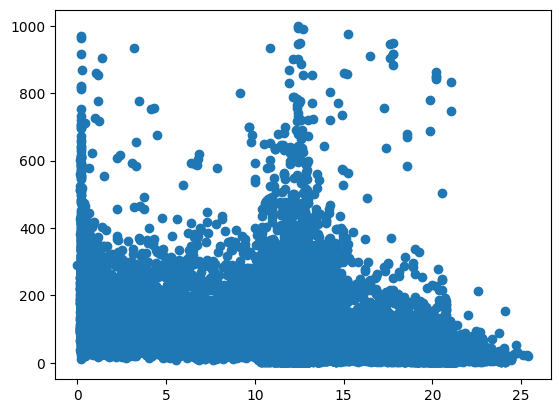

In [10]:
import matplotlib.pyplot as plt
import math
plt.scatter(tmp['energy_star_rating']/tmp['floor_area'].apply(lambda x: math.log(x, 10)), tmp['site_eui'])

In [6]:
display(train['facility_type'].nunique())
train['facility_type'].unique()

60

array(['Grocery_store_or_food_market',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Enclosed_mall', 'Education_Other_classroom',
       'Warehouse_Nonrefrigerated', 'Warehouse_Selfstorage',
       'Office_Uncategorized', 'Data_Center', 'Commercial_Other',
       'Mixed_Use_Predominantly_Commercial',
       'Office_Medical_non_diagnostic', 'Education_College_or_university',
       'Industrial', 'Laboratory',
       'Public_Assembly_Entertainment_culture',
       'Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized',
       'Lodging_Hotel', 'Retail_Strip_shopping_mall',
       'Education_Uncategorized', 'Health_Care_Inpatient',
       'Public_Assembly_Drama_theater', 'Public_Assembly_Social_meeting',
       'Religious_worship', 'Mixed_Use_Commercial_and_Residential',
       'Office_Bank_or_other_financial', 'Parking_Garage',
       'Commercial_Unknown', 'Service_Vehicle_service_repair_shop',
       'Service_Drycleaning_or_Laundry', 'Public_Assembly_Recreation

In [60]:
types0 = {'Commercial':[
'Grocery_store_or_food_market',
'Retail_Enclosed_mall',
'Retail_Vehicle_dealership_showroom',
'Retail_Strip_shopping_mall',
'Retail_Uncategorized',
'Commercial_Other',
'Commercial_Unknown',
'Food_Sales',],

'Industrial/Warehouse':[
'Warehouse_Distribution_or_Shipping_center',
'Warehouse_Nonrefrigerated',
'Warehouse_Selfstorage',
'Warehouse_Refrigerated',
'Industrial',
'Warehouse_Uncategorized'],

'Office/Educational':[
'Education_Other_classroom',
'Office_Uncategorized',
'Office_Medical_non_diagnostic',
'Education_College_or_university',
'Office_Bank_or_other_financial',
'Laboratory',
'Data_Center',
'Mixed_Use_Predominantly_Commercial',
'Office_Mixed_use',
'Education_Preschool_or_daycare',
'Education_Uncategorized',],

'Hospitality/Healthcare':[
'Lodging_Hotel',
'Health_Care_Inpatient',
'Health_Care_Outpatient_Clinic',
'Nursing_Home',
'Health_Care_Uncategorized',
'Health_Care_Outpatient_Uncategorized',],

'Miscellaneous/Public':[
'Public_Assembly_Entertainment_culture',
'Public_Assembly_Social_meeting',
'Public_Assembly_Drama_theater',
'Public_Assembly_Recreation',
'Public_Assembly_Movie_Theater',
'Public_Assembly_Library',
'Public_Assembly_Uncategorized',
'Religious_worship',
'Public_Assembly_Stadium',
'Public_Safety_Fire_or_police_station',
'Public_Safety_Penitentiary',
'Public_Safety_Courthouse',
'Public_Safety_Uncategorized',
'Public_Assembly_Other',],

'Residential':[
'Multifamily_Uncategorized',
'Lodging_Dormitory_or_fraternity_sorority',
'Lodging_Other',
'Mixed_Use_Predominantly_Residential',
'Lodging_Uncategorized',
'Mixed_Use_Commercial_and_Residential',
'5plus_Unit_Building',
'2to4_Unit_Building',],

'Service/Food':[
'Food_Service_Uncategorized',
'Food_Service_Other',
'Food_Service_Restaurant_or_cafeteria',
'Service_Vehicle_service_repair_shop',
'Service_Drycleaning_or_Laundry',
'Service_Uncategorized',],

'Parking/Garage':[
'Parking_Garage',]}

types = {}
for k, vs in types0.items():
    for v in vs:
        types[v] = k

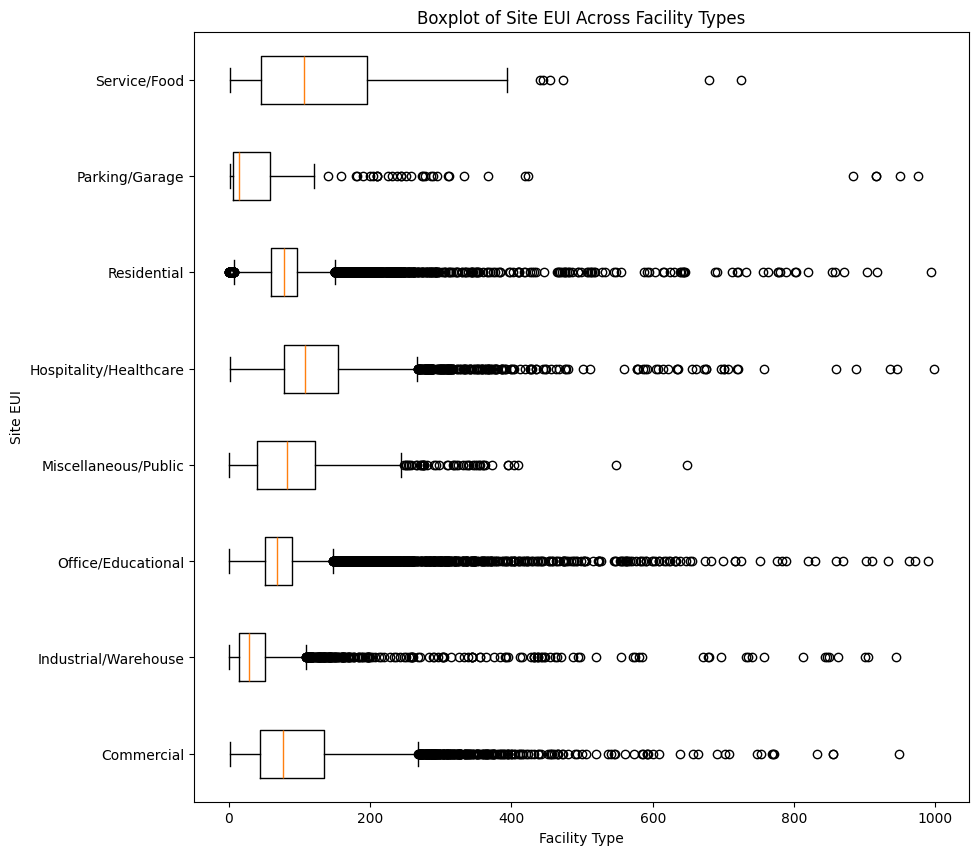

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

# Create a DataFrame to hold the data
df = pd.DataFrame()
df['facility_type'] = train['facility_type'].apply(lambda x: types[x])
df['site_eui'] = train['site_eui']

# Create a list to hold site_eui values for each facility type
data = [df[df['facility_type'] == f]['site_eui'] for f in df['facility_type'].unique()]

# Plot the boxplot
plt.boxplot(data, labels=df['facility_type'].unique(), vert=False)
plt.xlabel('Facility Type')
plt.ylabel('Site EUI')
plt.title('Boxplot of Site EUI Across Facility Types')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x27c19eef950>,
 'caps': [<matplotlib.lines.Line2D at 0x27c19eefef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c19eef6e0>],
 'medians': [<matplotlib.lines.Line2D at 0x27c19f1c4a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27c19f1c7a0>],
 'means': []}

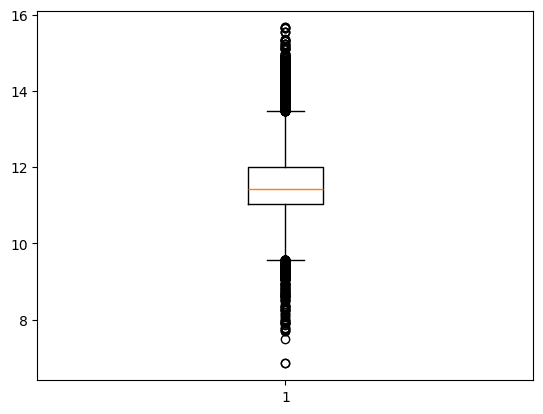

In [106]:
plt.boxplot(train['floor_area'].apply(lambda x: np.log(x)))

In [94]:
df['floor_area'] = train['floor_area']
df['floor_area_log'] = df['floor_area'].apply(lambda x: np.log10(x))

In [95]:
display(df['floor_area'].describe().T)
df['floor_area_log'].describe().T

count    7.575700e+04
mean     1.659839e+05
std      2.468758e+05
min      9.430000e+02
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
max      6.385382e+06
Name: floor_area, dtype: float64

count    75757.000000
mean         5.022944
std          0.377380
min          2.974512
25%          4.795038
50%          4.960789
75%          5.220108
max          6.805187
Name: floor_area_log, dtype: float64

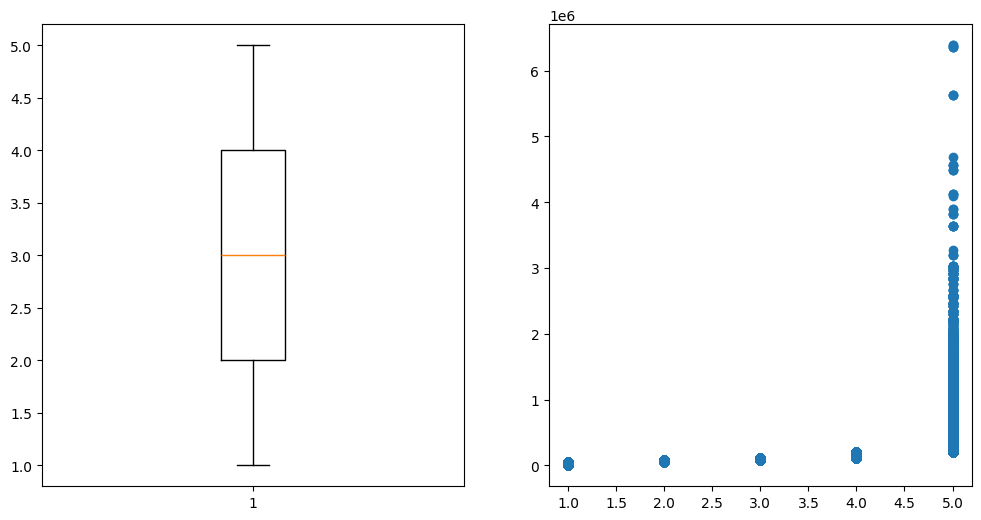

In [96]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([pd.qcut(df["floor_area"], q=5, labels=range(1, 6))])
plt.subplot(1, 2, 2)
plt.scatter(pd.qcut(df["floor_area"], q=5, labels=range(1, 6)), df["floor_area"])
plt.show()

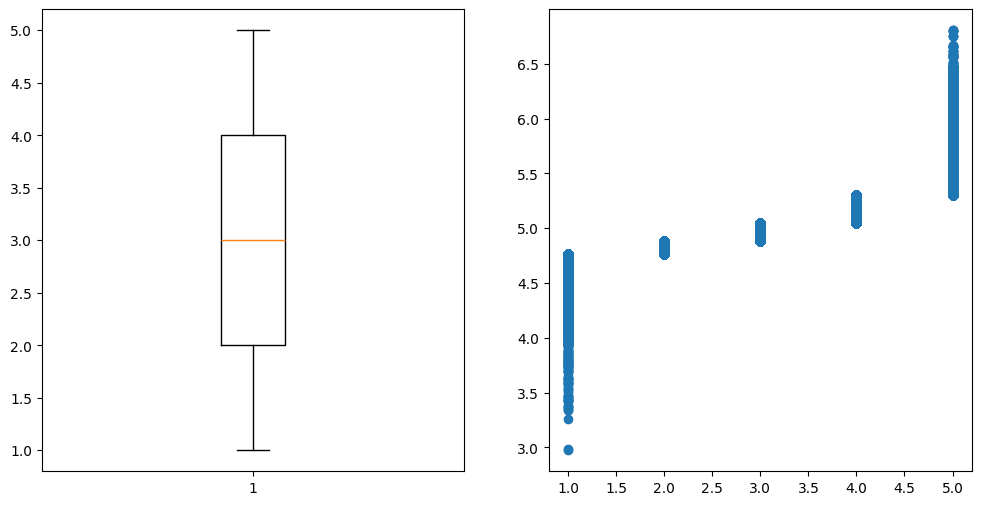

In [97]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([pd.qcut(df["floor_area_log"], q=5, labels=range(1, 6))])
plt.subplot(1, 2, 2)
plt.scatter(pd.qcut(df["floor_area_log"], q=5, labels=range(1, 6)), df["floor_area_log"])
plt.show()

In [99]:
df['fal'] = pd.qcut(df["floor_area_log"], q=5, labels=range(1, 6))
df[['facility_type', 'fal']].head()


,facility_type,fal
0,Commercial,2
1,Industrial/Warehouse,5
2,Commercial,5
3,Office/Educational,1
4,Industrial/Warehouse,2


In [102]:
df['tfal'] = df['facility_type'] + "_" + df['fal'].astype(str)
df[['tfal']].head()

,tfal
0,Commercial_2
1,Industrial/Warehouse_5
2,Commercial_5
3,Office/Educational_1
4,Industrial/Warehouse_2


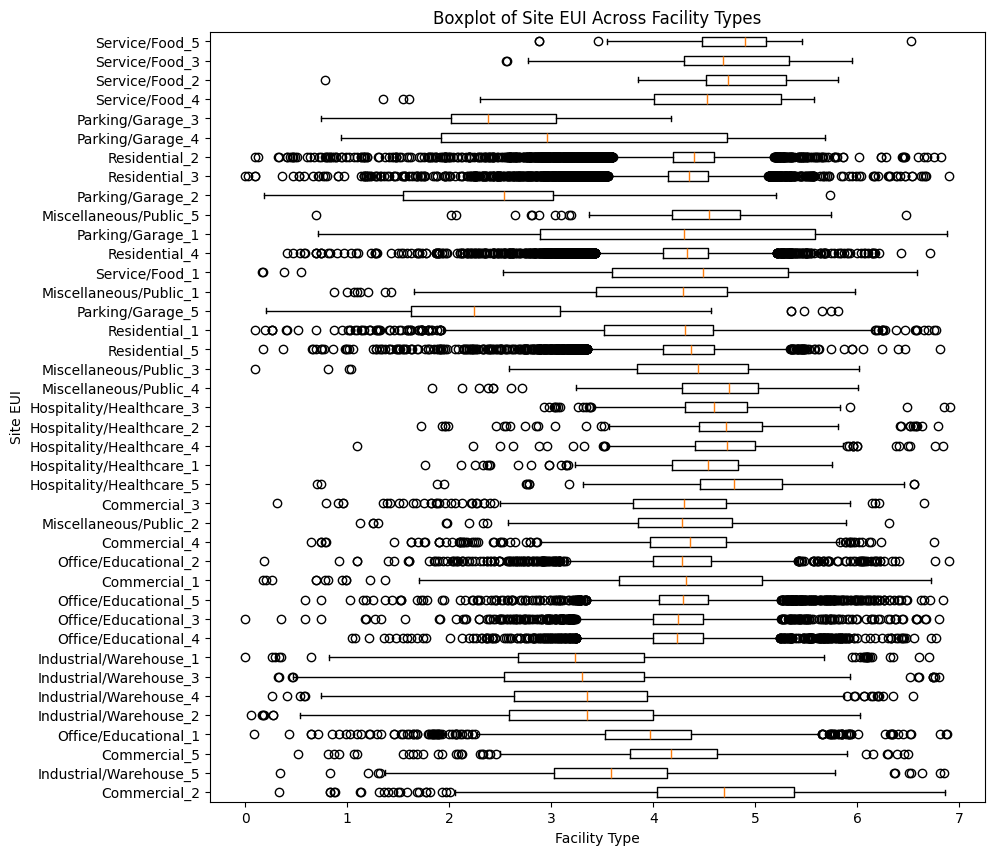

In [161]:
plt.figure(figsize=(10, 10))
data = [np.log(df[df['tfal'] == f]['site_eui']) for f in df['tfal'].unique()]

# Plot the boxplot
plt.boxplot(data, labels=df['tfal'].unique(), vert=False)
plt.xlabel('Facility Type')
plt.ylabel('Site EUI')
plt.title('Boxplot of Site EUI Across Facility Types')
plt.show()

In [127]:
df[['floor_area_log', 'fal']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   floor_area_log  75757 non-null  float64 
 1   fal             75757 non-null  category
dtypes: category(1), float64(1)
memory usage: 666.1 KB


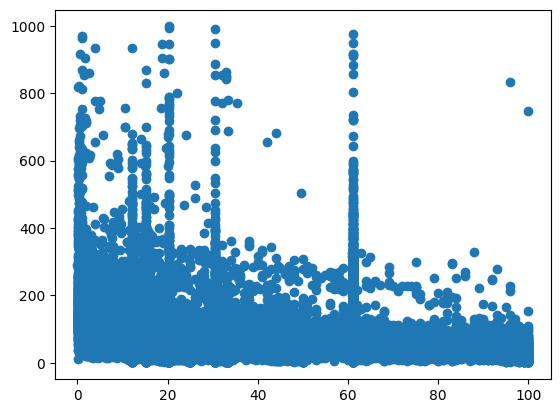

In [148]:
df['energy_star_rating'] = train['energy_star_rating'].fillna(train['energy_star_rating'].mean())
plt.scatter(df['energy_star_rating']/df['fal'].astype(np.float64), df['site_eui'])


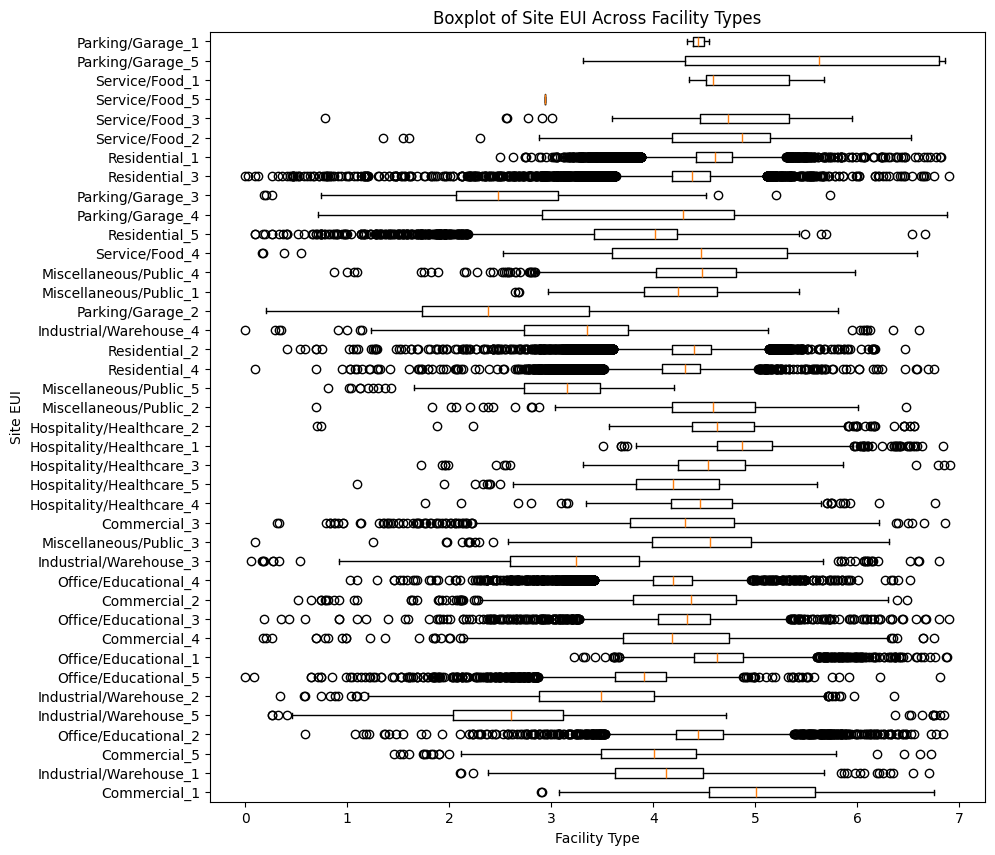

In [160]:
df['tetrfal'] = df['facility_type'] + "_" + pd.qcut(df['energy_star_rating']/df['floor_area_log'], q=5, labels=range(1, 6)).astype(str)
# pd.qcut(df['energy_star_rating']/df['floor_area_log'], q=5, labels=range(1, 6))
plt.figure(figsize=(10, 10))
data = [np.log(df[df['tetrfal'] == f]['site_eui']) for f in df['tetrfal'].unique()]

# Plot the boxplot
plt.boxplot(data, labels=df['tetrfal'].unique(), vert=False)
plt.xlabel('Facility Type')
plt.ylabel('Site EUI')
plt.title('Boxplot of Site EUI Across Facility Types')
plt.show()

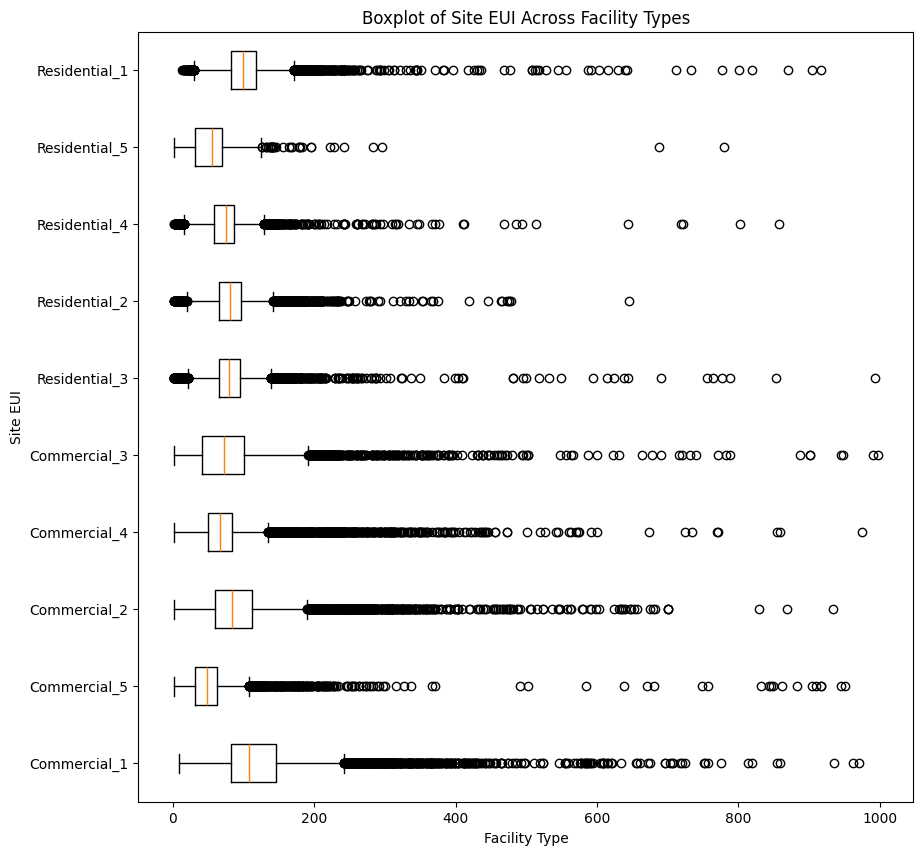

In [193]:
df['building_class'] = train['building_class']
df['bctetrfal'] = df['building_class'] + "_" + pd.qcut(df['energy_star_rating']/df['floor_area_log'], q=5, labels=range(1, 6)).astype(str)
# pd.qcut(df['energy_star_rating']/df['floor_area_log'], q=5, labels=range(1, 6))
plt.figure(figsize=(10, 10))
data = [df[df['bctetrfal'] == f]['site_eui'] for f in df['bctetrfal'].unique()]

# Plot the boxplot
plt.boxplot(data, labels=df['bctetrfal'].unique(), vert=False)
plt.xlabel('Facility Type')
plt.ylabel('Site EUI')
plt.title('Boxplot of Site EUI Across Facility Types')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27c2d22f1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x27c2ebd3650>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c1db3ea80>],
 'medians': [<matplotlib.lines.Line2D at 0x27c2ebd3ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27c2ebd2d80>],
 'means': []}

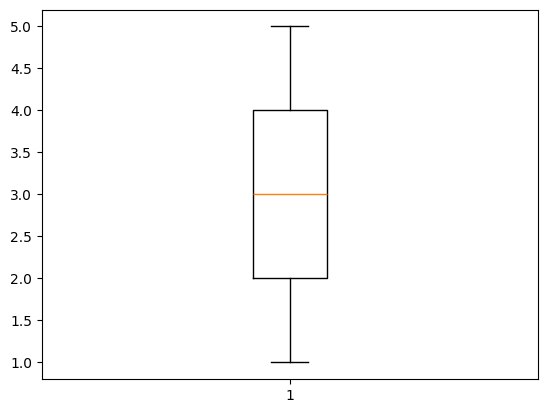

In [150]:
plt.boxplot(pd.qcut(df['energy_star_rating']/df['floor_area_log'], q=5, labels=range(1, 6)))

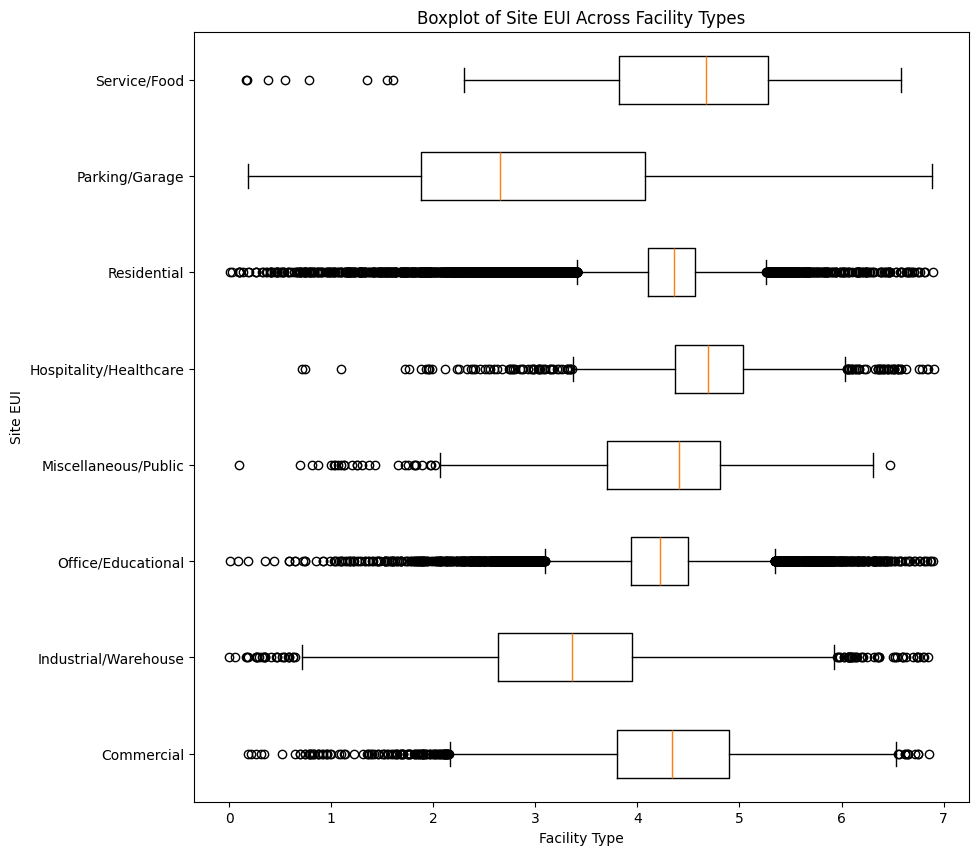

In [159]:
plt.figure(figsize=(10, 10))
data = [np.log(df[df['facility_type'] == f]['site_eui']) for f in df['facility_type'].unique()]

# Plot the boxplot
plt.boxplot(data, labels=df['facility_type'].unique(), vert=False)
plt.xlabel('Facility Type')
plt.ylabel('Site EUI')
plt.title('Boxplot of Site EUI Across Facility Types')
plt.show()

In [157]:
df['site_eui'].describe(include='all')

count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x27c34af7860>,
 'caps': [<matplotlib.lines.Line2D at 0x27c34af79b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c34af7500>],
 'medians': [<matplotlib.lines.Line2D at 0x27c34ab7980>],
 'fliers': [<matplotlib.lines.Line2D at 0x27c34acb590>],
 'means': []}

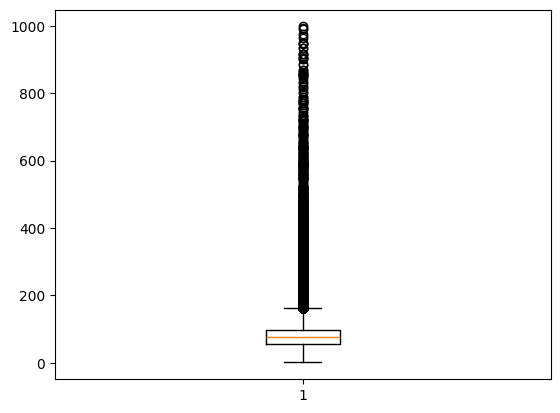

In [158]:
plt.boxplot(df['site_eui'])

{'whiskers': [<matplotlib.lines.Line2D at 0x27c33105310>,
 'caps': [<matplotlib.lines.Line2D at 0x27c33105850>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c33104e60>],
 'medians': [<matplotlib.lines.Line2D at 0x27c33105d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x27c33106090>],
 'means': []}

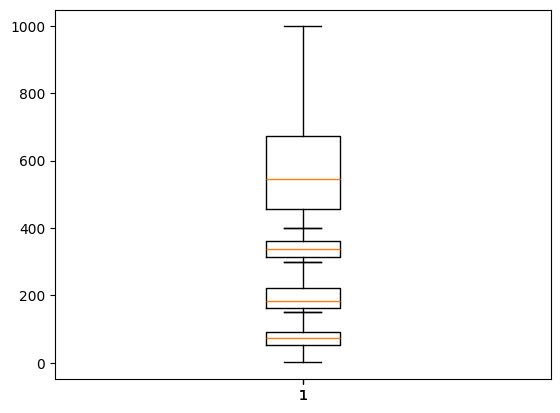

In [185]:
plt.boxplot(df['site_eui'][df['site_eui'] <= 150])
plt.boxplot(df['site_eui'][(df['site_eui'] > 150) & (df['site_eui'] <= 300)])
plt.boxplot(df['site_eui'][(df['site_eui'] > 300) & (df['site_eui'] <= 400)])
plt.boxplot(df['site_eui'][df['site_eui'] > 400])

In [165]:
np.log10(df['site_eui']).describe()

count    75757.000000
mean         1.833610
std          0.291876
min          0.000508
25%          1.736624
50%          1.876759
75%          1.988013
max          2.999072
Name: site_eui, dtype: float64

In [241]:
types0 = {'Commercial':[
'Grocery_store_or_food_market',
'Retail_Enclosed_mall',
'Retail_Vehicle_dealership_showroom',
'Retail_Strip_shopping_mall',
'Retail_Uncategorized',
'Commercial_Other',
'Commercial_Unknown',
'Food_Sales',],

'Industrial/Warehouse':[
'Warehouse_Distribution_or_Shipping_center',
'Warehouse_Nonrefrigerated',
'Warehouse_Selfstorage',
'Warehouse_Refrigerated',
'Industrial',
'Warehouse_Uncategorized'],

'Office/Educational':[
'Education_Other_classroom',
'Office_Uncategorized',
'Office_Medical_non_diagnostic',
'Education_College_or_university',
'Office_Bank_or_other_financial',
'Laboratory',
'Data_Center',
'Mixed_Use_Predominantly_Commercial',
'Office_Mixed_use',
'Education_Preschool_or_daycare',
'Education_Uncategorized',],

'Hospitality/Healthcare':[
'Lodging_Hotel',
'Health_Care_Inpatient',
'Health_Care_Outpatient_Clinic',
'Nursing_Home',
'Health_Care_Uncategorized',
'Health_Care_Outpatient_Uncategorized',],

'Miscellaneous/Public':[
'Public_Assembly_Entertainment_culture',
'Public_Assembly_Social_meeting',
'Public_Assembly_Drama_theater',
'Public_Assembly_Recreation',
'Public_Assembly_Movie_Theater',
'Public_Assembly_Library',
'Public_Assembly_Uncategorized',
'Religious_worship',
'Public_Assembly_Stadium',
'Public_Safety_Fire_or_police_station',
'Public_Safety_Penitentiary',
'Public_Safety_Courthouse',
'Public_Safety_Uncategorized',
'Public_Assembly_Other',],

'Residential':[
'Multifamily_Uncategorized',
'Lodging_Dormitory_or_fraternity_sorority',
'Lodging_Other',
'Mixed_Use_Predominantly_Residential',
'Lodging_Uncategorized',
'Mixed_Use_Commercial_and_Residential',
'5plus_Unit_Building',
'2to4_Unit_Building',],

'Service/Food':[
'Food_Service_Uncategorized',
'Food_Service_Other',
'Food_Service_Restaurant_or_cafeteria',
'Service_Vehicle_service_repair_shop',
'Service_Drycleaning_or_Laundry',
'Service_Uncategorized',],

'Parking/Garage':[
'Parking_Garage',]}

types = {}
for k, vs in types0.items():
    for v in vs:
        types[v] = k


In [266]:
train[['avg_temp']].describe().loc[['min', '25%', '50%', '75%', 'max']].values.astype(int).squeeze()

array([44, 55, 56, 57, 63])

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("./widsdatathon2022/train.csv")
test = pd.read_csv("./widsdatathon2022/test.csv")

train = train[train['year_built'] != 0]
train = train.dropna(subset=['year_built'])

for col in train.columns:
    if pd.api.types.is_numeric_dtype(train[col]):
        train[col] = train[col].fillna(train[col].mean())

train = train.dropna(subset=['december_avg_temp', 'january_avg_temp', 'february_avg_temp',
                           'march_avg_temp', 'april_avg_temp', 'may_avg_temp',
                           'june_avg_temp', 'july_avg_temp', 'august_avg_temp',
                           'september_avg_temp', 'october_avg_temp', 'november_avg_temp'])


# 카테고리형 데이터의 결측치 처리
for col in train.columns:
    if pd.api.types.is_string_dtype(train[col]):
        train[col] = train[col].fillna(train[col].mode()[0])

train['facility_type8'] = train['facility_type'].apply(lambda x: types[x])
train['winter'] = pd.qcut(train[['december_avg_temp', 'january_avg_temp', 'february_avg_temp']].mean(axis=1), q=5, labels=range(1, 6))
train['spring'] = pd.qcut(train[['march_avg_temp', 'april_avg_temp', 'may_avg_temp']].mean(axis=1), q=5, labels=range(1, 6))
train['summer'] = pd.qcut(train[['june_avg_temp', 'july_avg_temp', 'august_avg_temp']].mean(axis=1), q=5, labels=range(1, 6))
train['fall'] = pd.qcut(train[['september_avg_temp', 'october_avg_temp', 'november_avg_temp']].mean(axis=1), q=5, labels=range(1, 6))
train['avg_temp_qcut'] = pd.qcut(train[['avg_temp']].mean(axis=1), q=5, labels=train[['avg_temp']].describe().loc[['min', '25%', '50%', '75%', 'max']].values.astype(int).squeeze())

under_75 = train[train['site_eui'] <= 97.277534]
upper_75 = train[train['site_eui'] > 97.277534]

In [303]:
train.info()
train.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 73914 entries, 0 to 75756
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year_Factor                73914 non-null  int64   
 1   State_Factor               73914 non-null  object  
 2   building_class             73914 non-null  object  
 3   facility_type              73914 non-null  object  
 4   floor_area                 73914 non-null  float64 
 5   year_built                 73914 non-null  float64 
 6   energy_star_rating         48439 non-null  float64 
 7   ELEVATION                  73914 non-null  float64 
 8   january_min_temp           73914 non-null  int64   
 9   january_avg_temp           73914 non-null  float64 
 10  january_max_temp           73914 non-null  int64   
 11  february_min_temp          73914 non-null  int64   
 12  february_avg_temp          73914 non-null  float64 
 13  february_max_temp          73914 non

,count,mean,std,min,25%,50%,75%,max
Year_Factor,73914.0,4.397624,1.463808,1.000000,3.000000,5.000000,6.000000,6.000000e+00
floor_area,73914.0,166074.854734,244047.757427,1800.000000,62790.000000,92000.000000,166260.000000,6.353396e+06
year_built,73914.0,1952.465243,32.613687,1600.000000,1927.000000,1951.000000,1977.000000,2.015000e+03
energy_star_rating,48439.0,61.042445,28.660422,0.000000,40.000000,67.000000,85.000000,1.000000e+02
ELEVATION,73914.0,38.329108,52.204182,1.800000,11.900000,25.000000,42.700000,4.703000e+02
...,...,...,...,...,...,...,...,...
direction_peak_wind_speed,33212.0,63.804378,131.162326,1.000000,1.000000,1.000000,1.000000,3.600000e+02
max_wind_speed,33916.0,4.240420,6.497955,1.000000,1.000000,1.000000,1.000000,2.330000e+01
days_with_fog,29399.0,109.838430,50.634099,12.000000,88.000000,106.000000,131.000000,3.110000e+02
site_eui,73914.0,82.755150,57.838325,1.001169,55.157951,75.534998,97.333333,9.978661e+02


In [304]:
train.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

Text(0, 0.5, 'cool/heating_gedree_days')

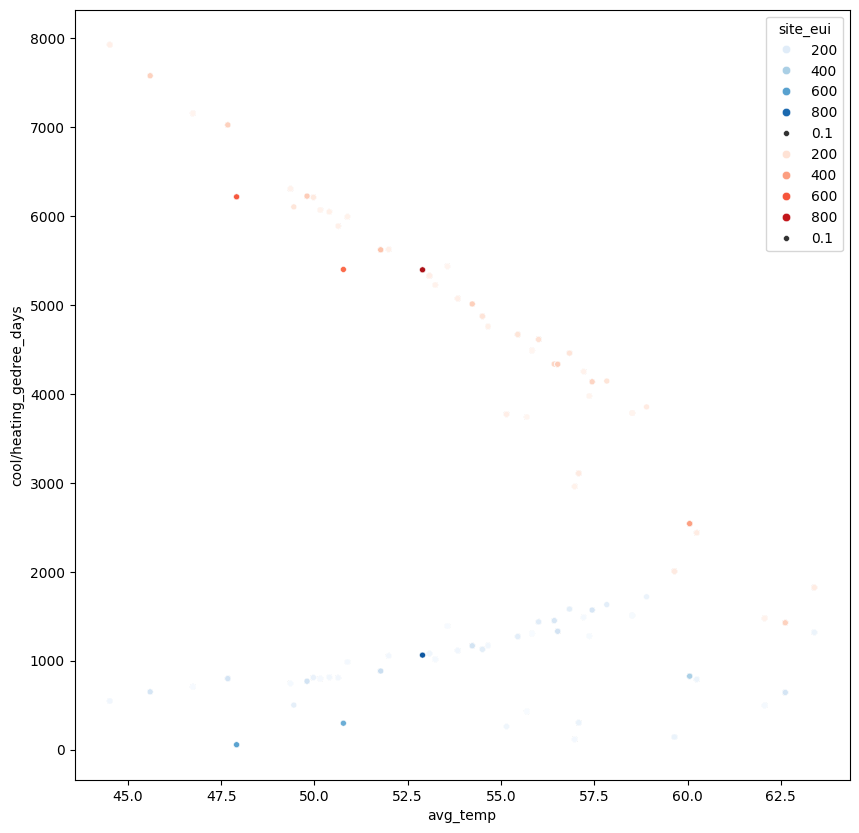

In [309]:
plt.figure(figsize=(10, 10))
sns.scatterplot(upper_75, x='avg_temp', y='cooling_degree_days', palette='Blues', size=0.1, hue='site_eui')
sns.scatterplot(upper_75, x='avg_temp', y='heating_degree_days', palette='Reds', size=0.1, hue='site_eui')
plt.ylabel('cool/heating_gedree_days')

Text(0, 0.5, 'cool/heating_gedree_days')

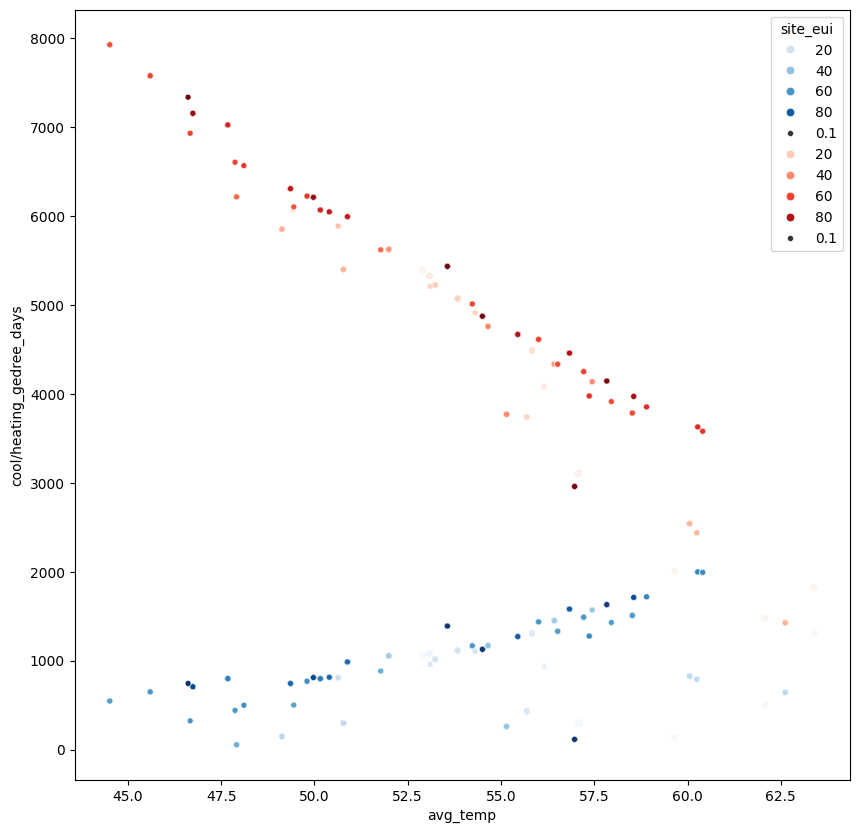

In [310]:
plt.figure(figsize=(10, 10))
sns.scatterplot(under_75, x='avg_temp', y='cooling_degree_days', palette='Blues', size=0.1, hue='site_eui')
sns.scatterplot(under_75, x='avg_temp', y='heating_degree_days', palette='Reds', size=0.1, hue='site_eui')
plt.ylabel('cool/heating_gedree_days')

In [285]:
def show_eui(hue=None):
    plt.figure(figsize=(20, 20))
    sns.scatterplot(x='floor_area', y='site_eui', hue=hue, palette='Blues', size=0.1, data=under_75)
    sns.scatterplot(x='floor_area', y='site_eui', hue=hue, palette='Reds', size=0.1, data=upper_75)
    plt.plot([0, train['floor_area'].max()], [97.277534]*2, 'y')
    plt.show()

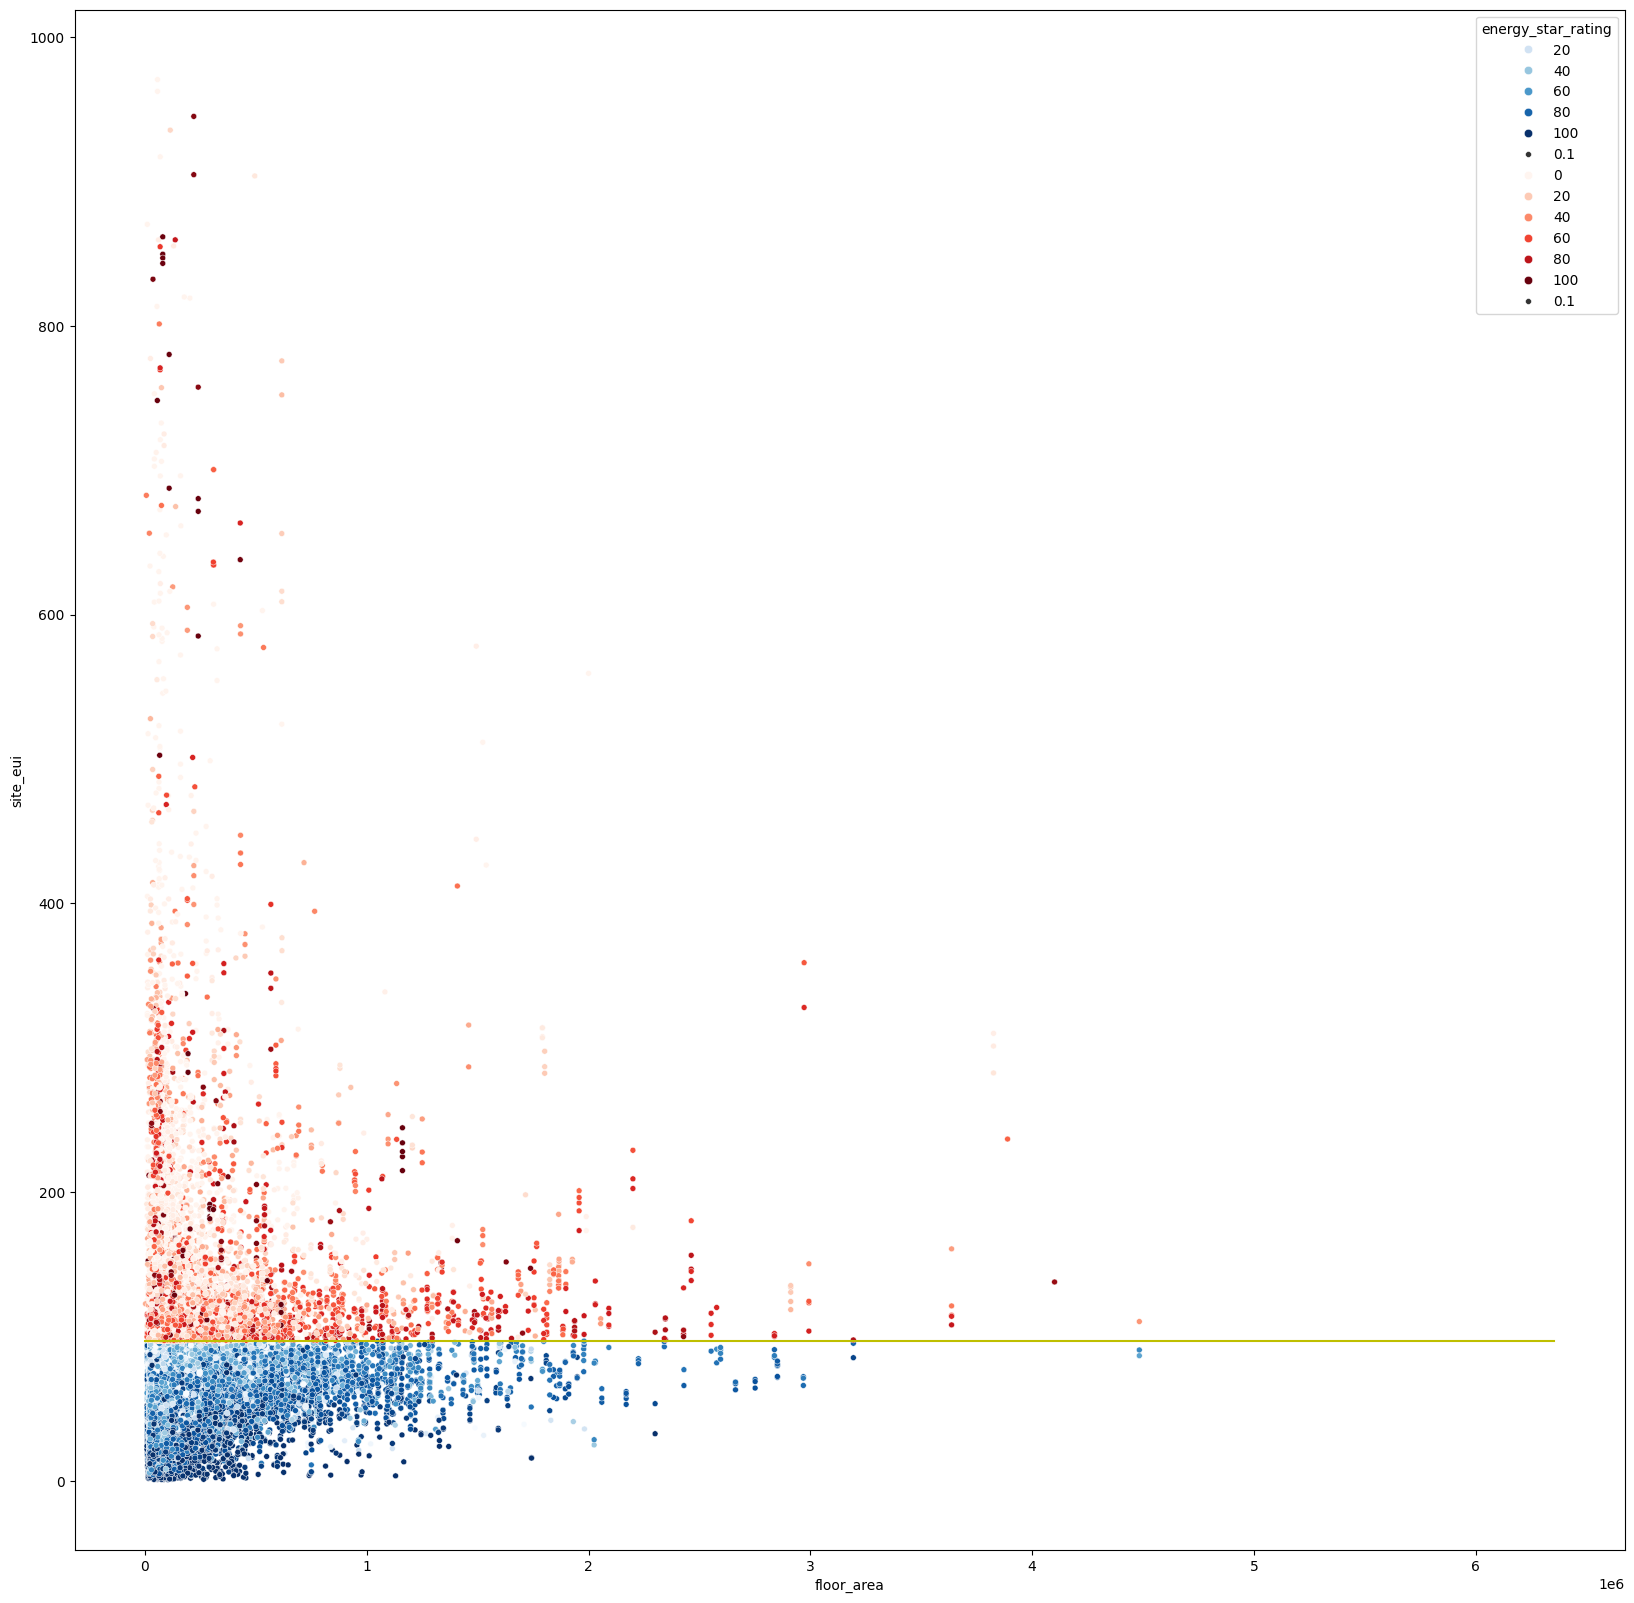

In [311]:
show_eui('energy_star_rating')


<Axes: xlabel='floor_area', ylabel='site_eui'>

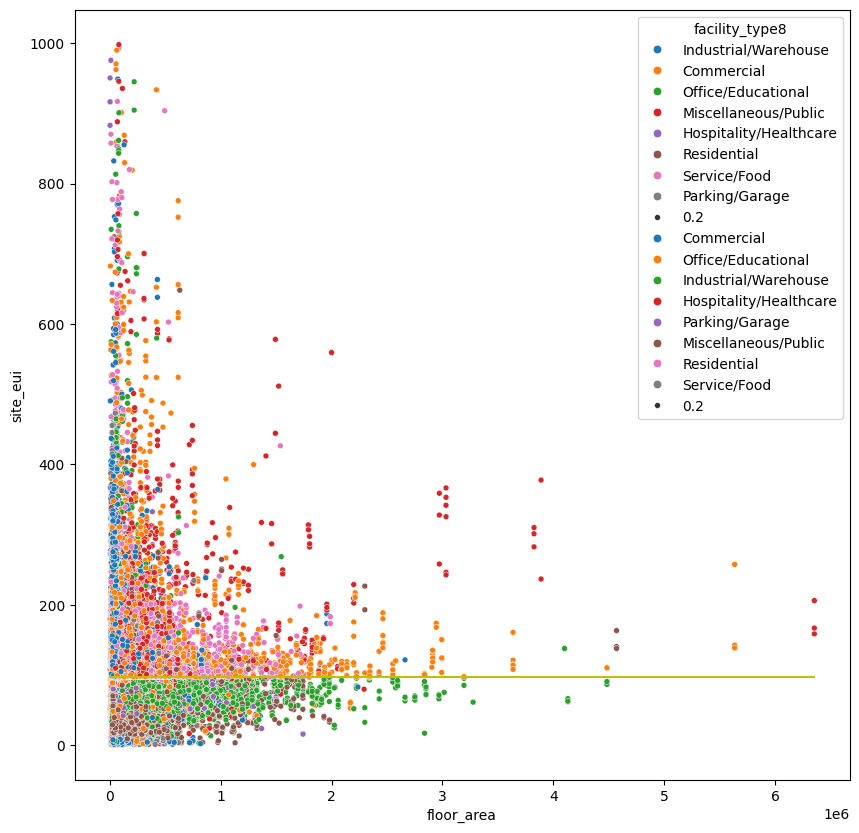

In [282]:
plt.figure(figsize=(10, 10))
plt.plot([0, train['floor_area'].max()], [97.277534]*2, 'y')
sns.scatterplot(x='floor_area', y='site_eui', hue='facility_type8', palette='Blues', size=0.2, data=under_75)
sns.scatterplot(x='floor_area', y='site_eui', hue='facility_type8', palette='Reds', size=0.2, data=upper_75)

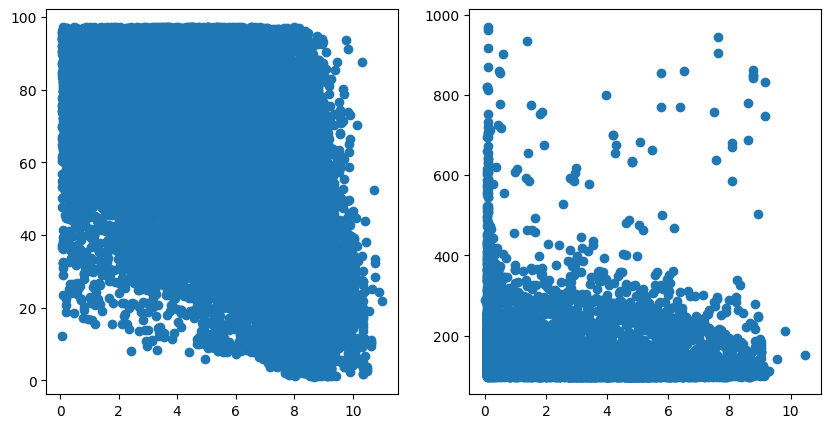

In [324]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(under_75['energy_star_rating']/np.log(under_75['floor_area']), under_75['site_eui'])
plt.subplot(1, 2, 2)
plt.scatter(upper_75['energy_star_rating']/np.log(upper_75['floor_area']), upper_75['site_eui'])

{'whiskers': [<matplotlib.lines.Line2D at 0x27ea1b434a0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ea1b43a70>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ea1b432c0>],
 'medians': [<matplotlib.lines.Line2D at 0x27ea1b43fe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ea1b782c0>],
 'means': []}

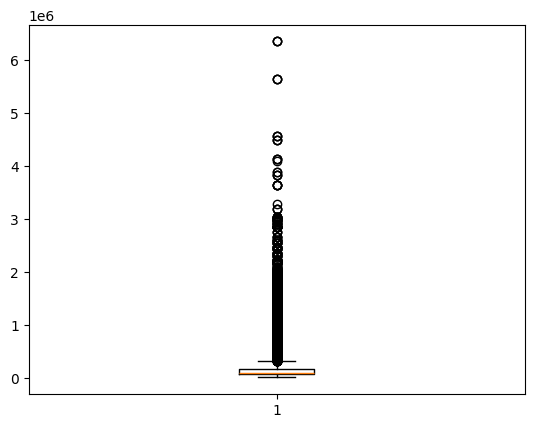

In [338]:
plt.boxplot(train['floor_area'])

In [341]:
train['floor_area'].describe().astype(int)

count      73914
mean      166074
std       244047
min         1800
25%        62790
50%        92000
75%       166260
max      6353396
Name: floor_area, dtype: int32

In [342]:
under_75_under_75 = under_75[under_75['floor_area'] <= 166260]
under_75_upper_75 = under_75[under_75['floor_area'] > 166260]
upper_75_under_75 = upper_75[upper_75['floor_area'] <= 166260]
upper_75_upper_75 = upper_75[upper_75['floor_area'] > 166260]

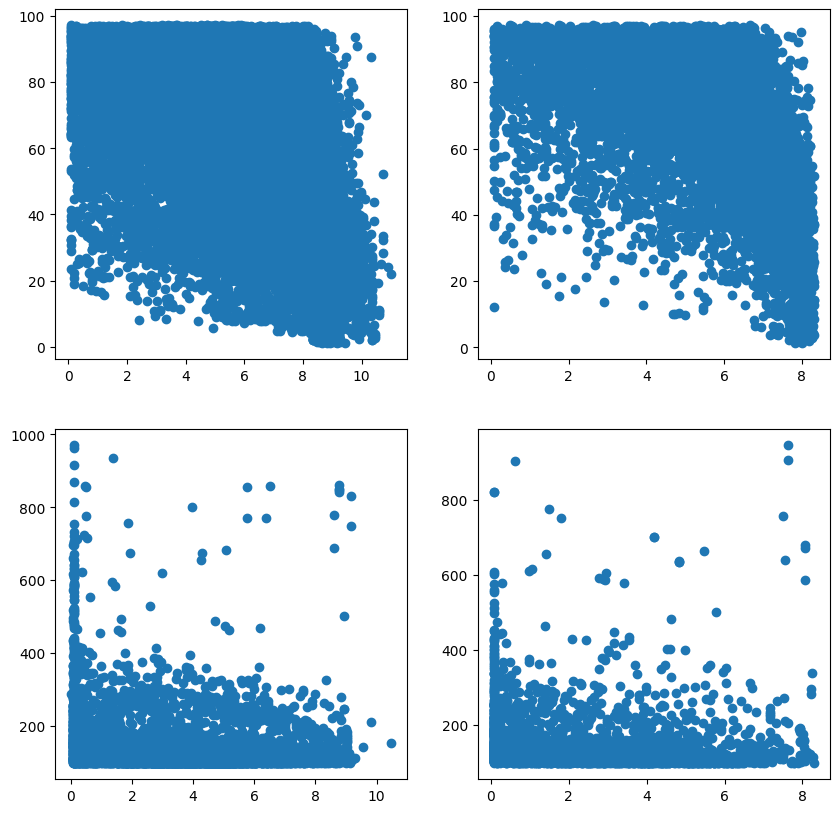

In [344]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(under_75_under_75['energy_star_rating']/np.log(under_75_under_75['floor_area']), under_75_under_75['site_eui'])
plt.subplot(2, 2, 2)
plt.scatter(under_75_upper_75['energy_star_rating']/np.log(under_75_upper_75['floor_area']), under_75_upper_75['site_eui'])

plt.subplot(2, 2, 3)
plt.scatter(upper_75_under_75['energy_star_rating']/np.log(upper_75_under_75['floor_area']), upper_75_under_75['site_eui'])
plt.subplot(2, 2, 4)
plt.scatter(upper_75_upper_75['energy_star_rating']/np.log(upper_75_upper_75['floor_area']), upper_75_upper_75['site_eui'])

{'whiskers': [<matplotlib.lines.Line2D at 0x27eae475d90>,
 'caps': [<matplotlib.lines.Line2D at 0x27eae4763c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27eae475c70>],
 'medians': [<matplotlib.lines.Line2D at 0x27eae476960>],
 'fliers': [<matplotlib.lines.Line2D at 0x27eae476ba0>],
 'means': []}

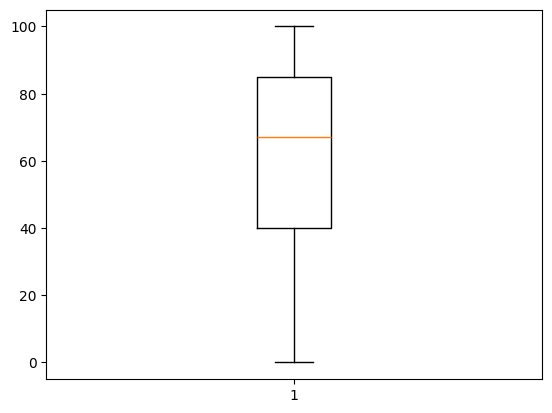

In [346]:
plt.boxplot(train['energy_star_rating'].dropna())